# COMPLETED BY: 
# Alejandro Jarabo Peñas (AJP)
# Miguel Taibo Martínez (MTM)

# Machine Learning in Python
Machine Learning is the study and application of algorithms that generate statistic models which are able to perform a specific task without being specifically coded. Those models are created by observing a set of samples and extracting and learning the patterns in samples data.

The most used library in Python to work with ML is SciKit-Learn https://scikit-learn.org/stable/. This module includes the implementations of dozens of different ML algorithms and the functions needed to handle and transform the data which will be used by the ML models.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

If you have any problem importing those modules, you might need to install or update them. If you are using Anaconda run an Anaconda Prompot and execute `conda install [package]`, or, if you are using just Python, open a terminal and execute `pip install [package]`.

Let's load our well known researchers and publications datasets:

In [46]:
#Load and change data types in publications cleaned and preprocessed data
publications = pd.read_csv('publications_clean_processed.csv')[['document_id','title','authors','pages','date','journal','openaccess','cited_count','type','year','n_authors']]
#Change publications data types
pub_dtype_dict = {
    'document_id': 'str',
    'authors': 'str',
    'pages': 'uint16',
    'title': 'str',
    'journal': 'str',
    'openaccess': 'bool',
    'cited_count': 'uint16', 
    'type': 'str',
    'year': 'uint16'
}
publications = publications.astype(pub_dtype_dict)
#Turn author ids into list of strings
str_authors_list = []
for publication in publications.itertuples() :
    pub_authors = publication.authors
    if pub_authors :
        try :
            str_authors = pub_authors[1:-1].split(',')
        except :
            str_authors = str(pub_authors)
    else : 
        str_authors = None
    str_authors_list.append(str_authors)
    
publications['authors'] = str_authors_list
publications.head()

document_id                                              title  \
0  85058136304  High-Efficiency High-Bandwidth Four-Quadrant F...   
1  85060314395  Energy-Buffered Single-Phase Inverter Operatin...   
2  85060302761  ZVS transitions in Multi-Mode Single Stage Inv...   
3  85060302746  Equivalent Parameters of Round and Litz Wire C...   
4  85060299891  Digital Variable Frequency Control of a Single...   

                                             authors  pages        date  \
0  [57204955584,  57200520067,  24922369500,  244...     15  2019-06-01   
1  [7005227142,  57200519327,  57200511770,  2443...      8  2018-12-03   
2  [57200511770,  57200519327,  56249124100,  244...      8  2018-12-03   
3  [57195619519,  57204116610,  24438258500,  700...      5  2018-12-03   
4  [57200519327,  57200511770,  24438258500,  562...      6  2018-12-03   

                                             journal  openaccess  cited_count  \
0  IEEE Journal of Emerging and Selected Topics i...       False            0   
1  2018 IEEE Energy Conversion Congress and Expos...       False            2   
2  2018 IEEE Energy Conversion Congress and Expos...       False            1   
3  2018 IEEE Energy Conversion Congress and Expos...       False            0   
4  2018 IEEE Energy Conversion Congress and Expos...       False            1   

               type  year  n_authors  
0           Article  2019          8  
1  Conference Paper  2018          5  
2  Conference Paper  2018          5  
3  Conference Paper  2018          5  
4  Conference Paper  2018          5

In [47]:
#Load and change data types in researchers cleaned and preprocessed data
researchers = pd.read_csv('researchers_clean_processed.csv')[['auth_id','name','last_name','citations','cited_by','publications','orcid','h_index']]
#Change researchers data types
res_dtype_dict = {
    'auth_id': 'str',
    'name': 'str',
    'last_name': 'str',
    'citations': 'uint16',
    'cited_by': 'uint16',
    'publications': 'uint16',
    'h_index': 'uint16'
}
researchers = researchers.astype(res_dtype_dict)
researchers.head()

auth_id          name       last_name  citations  cited_by  \
0   7005227142  José Antonio           Cobos       5267      3940   
1  55708653400        Javier          LLorca       9830      6350   
2   7007057622        Manuel          Elices       8251      4563   
3   6701646524    Marcela G.  González-Gross       7167      5244   
4   8899577600        Javier            Bajo       2213      1376   

   publications                orcid  h_index  
0           343                  NaN       33  
1           301                  NaN       54  
2           285                  NaN       53  
3           280                  NaN       42  
4           271  0000-0003-0824-4133       28

In [48]:
#Merge dataframes
data = researchers.merge(publications.rename(columns={"authors":"auth_id"}).explode("auth_id"), on="auth_id")
data.head()

auth_id          name last_name  citations  cited_by  publications  \
0  7005227142  José Antonio     Cobos       5267      3940           343   
1  7005227142  José Antonio     Cobos       5267      3940           343   
2  7005227142  José Antonio     Cobos       5267      3940           343   
3  7005227142  José Antonio     Cobos       5267      3940           343   
4  7005227142  José Antonio     Cobos       5267      3940           343   

  orcid  h_index  document_id  \
0   NaN       33  85060314395   
1   NaN       33  85046830952   
2   NaN       33  85041477745   
3   NaN       33  28744451073   
4   NaN       33   0033097121   

                                               title  pages        date  \
0  Energy-Buffered Single-Phase Inverter Operatin...      8  2018-12-03   
1  Guest Editorial Special Issue on Power Supply ...      2  2018-06-01   
2  Differential power as a metric to optimize pow...      8  2017-11-03   
3  Supplying energy to mobile and autonomous elec...      0  2004-12-01   
4  New driving scheme for self driven synchronous...      7  1999-03-01   

                                             journal  openaccess  cited_count  \
0  2018 IEEE Energy Conversion Congress and Expos...       False            2   
1  IEEE Journal of Emerging and Selected Topics i...       False            0   
2  2017 IEEE Energy Conversion Congress and Expos...       False            3   
3    International Power Electronics Congress - CIEP       False            0   
4  Conference Proceedings - IEEE Applied Power El...       False           31   

               type  year  n_authors  
0  Conference Paper  2018          5  
1         Editorial  2018          2  
2  Conference Paper  2017          6  
3  Conference Paper  2004          3  
4           Article  1999          5

Some of the calculations done in this notebook could be complex and too heavy for some computers. If your computer takes too long to run the experiments, you can reduce the datasets executing the following code (uncomment it)

In [49]:
# With this method we take sample of a dataset, the parameter frac indicates the percentage of the original data we keep
#publications = publications.sample(frac=0.5)
#researchers = researchers.sample(frac=0.5)
#data = researchers.merge(publications.rename(columns={"authors":"auth_id"}).explode("auth_id"), on="auth_id")

### Train and test
The main idea behind the machine learning is that the algorithm will observe a training set of samples, which we should be sure is representative of the data we are working with. From this training set, or training data, the algorithm will learn the patterns that describes the data and generates a model which can replicate the behavior shown on them. Then, using a *different* set of samples -that we call test set or test data- we will evaluate how accurate is the generated model, basically, by measuring the difference between the model output and the correct answer. It is very important to do not use the same data to train and test the model.

Let’s see it with an example.
We will use a popular dataset in ML called iris dataset. This dataset contains a series of measures of flowers and the type of the flower (for more info check https://archive.ics.uci.edu/ml/datasets/iris). As we will see later, the task of the model we are going to create is a classification task. 
The dataset is made of observations which contains 4 numeric variables and 1 categorical target. The task of the model is to predict the target of a sample observing its numeric variables.


Model accuracy: 97.78%


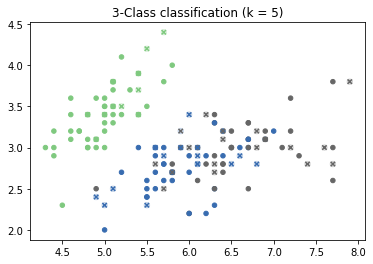

In [51]:
# This example is based in one example from the scikit learn documentation 
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

# Import neighbors algorithm and example datasets
from sklearn import neighbors, datasets
#To evaluate how good is the model
from sklearn import model_selection

n_neighbors = 5

iris = datasets.load_iris()

# In this notebook we will always use x as the features vector and y as the target
# Features to take into account to guess a target or class (x)
x = iris.data
# Target or class of the data - classification output (y)
y = iris.target

# Split data in train and test, we save the test_size prop of the data for testing
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.3)

# Create the model - In this case we use the k neighbors classifier(clf)
clf = neighbors.KNeighborsClassifier(n_neighbors)

# Train or fit the model using training splits of the data for x and y
clf.fit(x_train, y_train)

# Use the model generated to predict the target of the test data split
y_out = clf.predict(x_test)


plt.figure()
# Training instances
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap="Accent", s=20)
# Test instances target as stated in initial data - alpha sets the transparency
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="Accent", s=30, alpha=0.2)
# Test instances target as predicted by classifier
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_out, cmap="Accent", s=20, marker = "x")
#Graph title
plt.title("3-Class classification (k = %i)" % (n_neighbors))

#Accuracy obtained with model trained
print("Model accuracy: {:.2f}%".format(np.average(y_out==y_test)*100))

Although the dataset has 4 dimensions, the plot only shows 2 dimensions, easier for humans. The colors in the plot are the different types of flowers. Dots are the training data and crosses the test data, the background of each test sample is the correct type. The precision is just the accuracy of correct classifications made by the model.

### K-Fold Cross-Validation
Ensure that the partition of the data used to train the model is representative may not be an easy task. For example, in the previous dataset it could be that the data we select to train don't contain samples of one of the class, or may be that the test data were particularly easy to classify.

Cross Validation is a group of techniques that solve this problem, all of them are based on the idea of perform several trainings and testing’s using different partitions each time. The most basic, and most popular, is the K-Fold Cross Validation.
In K-Fold, we choose a number k (usually from 5 to 10), then we divide our dataset in k folds. We will train the model k times, in each iteration we will use k-1 folds as the train data and the remaining fold as test data. The evaluation of the final model is calculated as the average of the evaluations for each iteration.

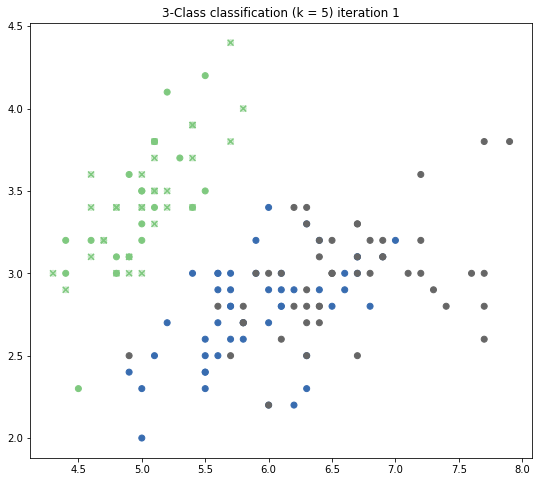

Iteration 1: Model accuracy: 100.00%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


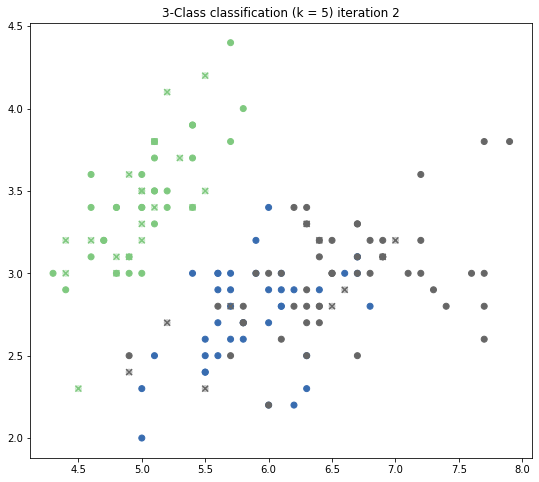

Iteration 2: Model accuracy: 100.00%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


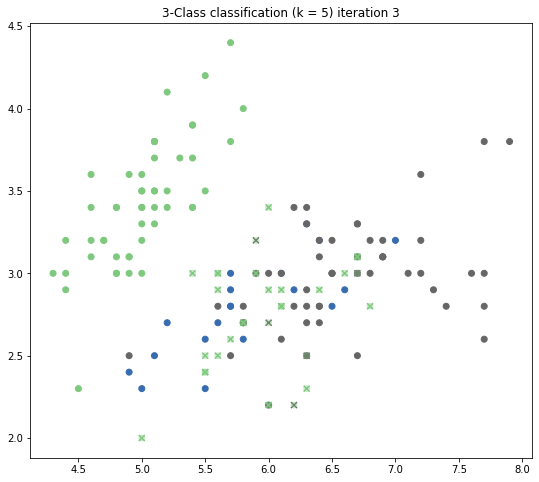

Iteration 3: Model accuracy: 83.33%
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1]


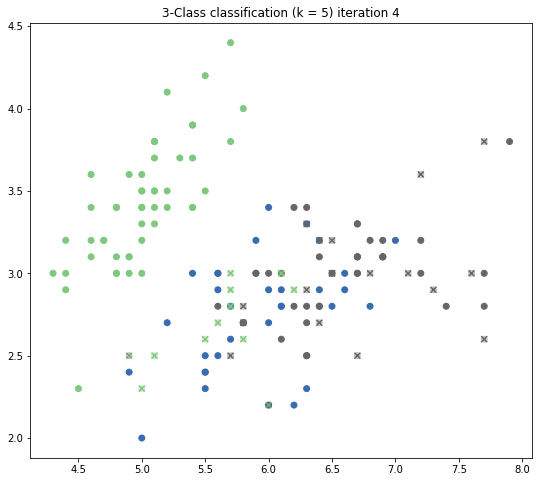

Iteration 4: Model accuracy: 93.33%
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1]


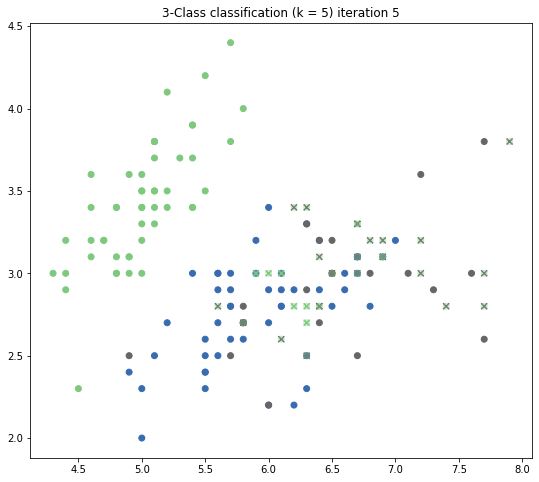

Iteration 5: Model accuracy: 80.00%
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1]
Global accuracy: 91.33%


In [52]:
# Algorith that implements cross validation
from sklearn.model_selection import KFold
# Use 5 partitions - 4 for training and 1 for testing
k = 5
kf = KFold(n_splits=k)
accuracies = []
i=0

# Train and obtain classification efficiency of each of the different splits
for train, test in kf.split(X): # train and test are the indices of the samples that will be used in each set
    i+=1
    x_train, x_test, y_train, y_test = X[train], X[test], y[train], y[test]
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(x_train, y_train)
    y_out = clf.predict(x_test)


    plt.figure(figsize=(9, 8))
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap="Accent")
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_out, cmap="Accent", marker = "x")
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="Accent", alpha=0.3)
    plt.title("3-Class classification (k = %i) iteration %i" % (n_neighbors,i))
    plt.show()
    accuracy = np.average(y_out==y_test)*100
    accuracies.append(accuracy)
    print("Iteration {}: Model accuracy: {:.2f}%".format(i,accuracy))
    print(y_test)
    print(y_out)
    
# Global accuracy
print("Global accuracy: {:.2f}%".format(np.average(accuracies)))

## Regression
Regression is one of the possible task for a ML model. The objective is to predict a numeric output based on the input. One example of this could be to predict the number of products that will be sell based on the previous sales or calculate the probability of the stock market grows tomorrow.

The most basic example of this task is to obtain the relation between two variables.

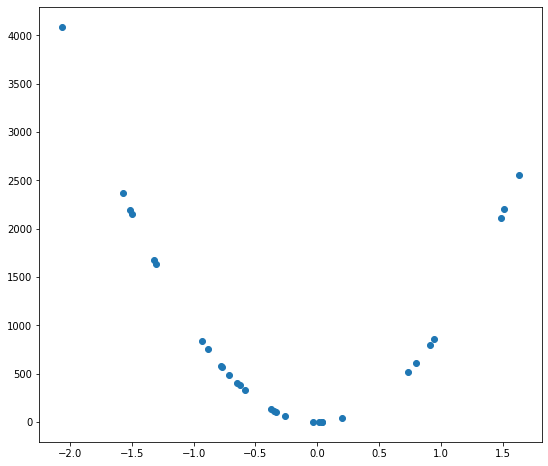

In [53]:
from sklearn import datasets
import math

# Create sample dataframe
x, y = datasets.make_regression(n_samples=30, n_features=1, noise=0)
# try to modify the relation between x and y or play with the noise value
y = y**2
#y = np.sin(y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.show()

Problems in the real world are more complicated, the target (variable we want to predict) usually depends on more variables (features).

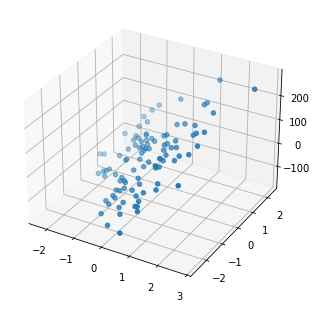

In [62]:
# %matplotlib qt 
# this makes that plots show in an interactive window
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
x, y = datasets.make_regression(n_samples=100, n_features=2, noise= 0)
ax.scatter(x[:,0], x[:,1],y)
plt.show()

In [69]:
# %matplotlib inline
# reset the plot behavior

#### Optional extra
Try to plot the iris dataset in a 3d plot

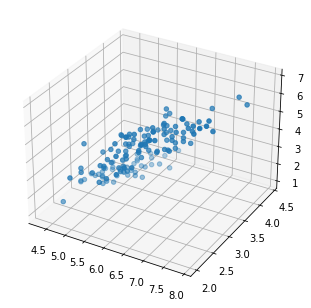

In [71]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(iris['data'][:,0], iris['data'][:,1],iris['data'][:,2])
plt.show()

### Some popular models
There are many different algorithms or models that can be used for regression tasks. Each of them has its advantages or disadvantages for each kind of problem, but to discuss them are far beyond of the scope of this course. We will just try them with their basic configuration and keep the one that best fits our case.

#### Linear regression
This is the most basic regression model. The algorithm will just try to minimize the error in a function like $Y=aX+b$, where $Y$ is the target and $X$ the vector of features.

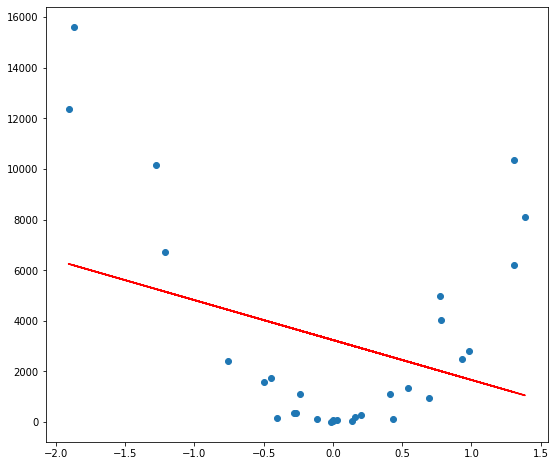

In [78]:
from sklearn.linear_model import LinearRegression
x, y = datasets.make_regression(n_samples=30, n_features=1, noise=10)

y=y**2
model = LinearRegression().fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x,model.predict(x), "r")
plt.show()

#### Decision Tree
This model is based on a tree structure in which each node represents a decision and each leaf an output. https://en.wikipedia.org/wiki/Decision_tree

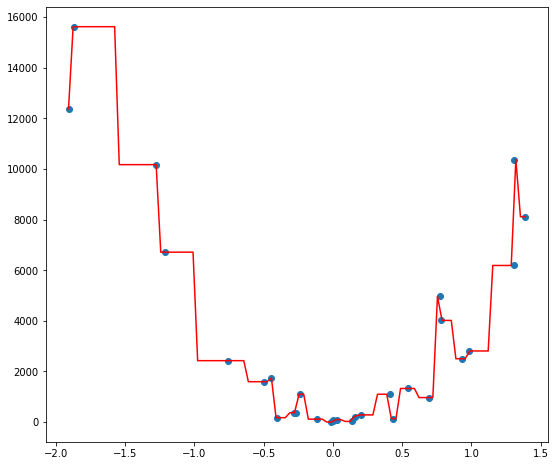

In [80]:
from sklearn.tree import DecisionTreeRegressor
x_test= np.linspace(x.min(),x.max(), 100)[:, np.newaxis]

model = DecisionTreeRegressor().fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "r")
plt.show()

#### Random Forest
This model belongs to a category called ensemble models because it is made of the aggregation of several models. In the case of random forest, we will have a set of decision trees which will calculate an output, then the output of the random forest will be the average of those outputs.

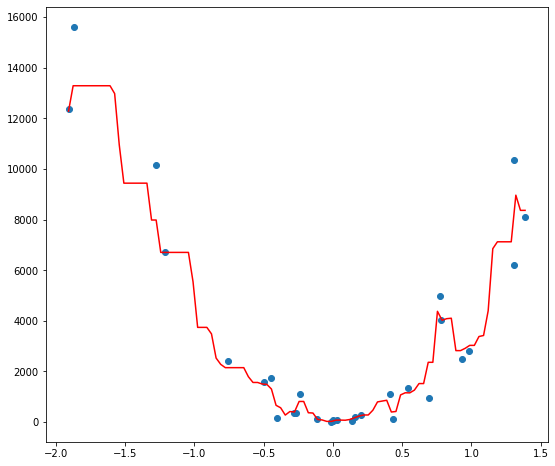

In [82]:
from sklearn.ensemble import RandomForestRegressor

# Forest with 100 decission trees
model = RandomForestRegressor(n_estimators=100).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "r")
plt.show()

#### K Nearest Neighbors
Given an input the output of this algorithm will be the average of the $k$ nearest points in the training set.

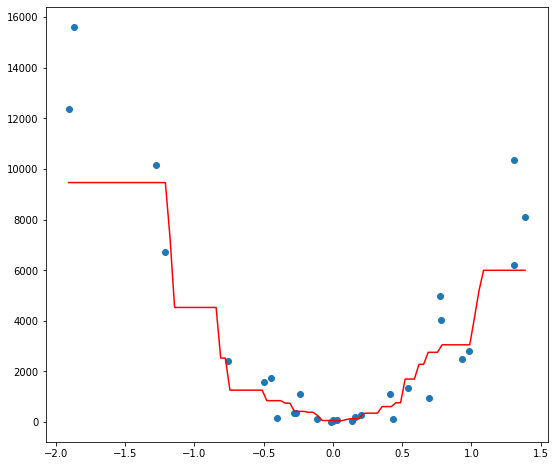

In [83]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "r")
plt.show()

#### Perceptron
This is the most basic Artificial Neural Network https://en.wikipedia.org/wiki/Artificial_neural_network. Opposite  to the others models shown, this one is a "black box" and we can't see how the algorithm calculates the output.

Don't worry if you get a warning when running this model

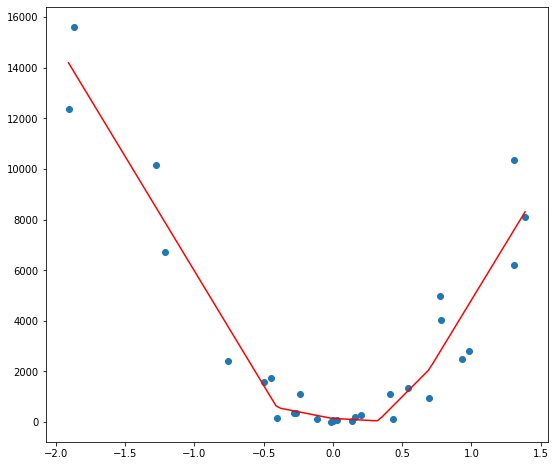

In [85]:
from sklearn.neural_network import MLPRegressor

# Iterations may not be enough to reach convergence -> Warning!
model = MLPRegressor(max_iter=200000).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "r")
plt.show()

### How to evaluate a regression model
We have trained 5 models and we can guess that some are better than others, but we need a formal way to evaluate the models. There are several ways to evaluate a regression model all of them based on the __error between the output of the model and the real answer__ when evaluating the test data, so the lower the error the better is the model. Let see some of them:

1. Max error: $max(| y_i - \hat{y}_i |)$

2. Mean absolute error or MAE: $\frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$

3. Mean squared error or MSE: $\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$

Don't worry about the math, scikit learn will do everything for us!

Remember about K-Folds Cross Validation when evaluate the models.

In [88]:
# Import metrics to evaluate regression models performance
from sklearn.metrics import  mean_absolute_error, mean_squared_error, max_error

# Create dictionary of models
models = {"Linear Regression": LinearRegression(), \
          "Decision Tree": DecisionTreeRegressor(), \
          "Random Forest": RandomForestRegressor(n_estimators=200), \
          "Nearest Neighbors": KNeighborsRegressor(n_neighbors=3), \
          "Perceptron": MLPRegressor(max_iter=20000)}

# Generate regression dataset
x, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 5)

# For each of the models
for name in models:
    print("Start training models of {}".format(name))
    i = 0
    
    # Lists for the calculated performance metrics
    me_global = []
    mae_global = []
    mse_global = []
    
    # Evaluate with cross-validation each model
    for train, test in kf.split(x):
        i+=1
        
        # Different train and test split for each iteration
        x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]
        
        # Fit the model with train data
        model = models[name].fit(x_train,y_train)
        
        # Predict targets over test data
        y_out = model.predict(x_test)
        
        # Calculate metrics comparing with known outputs
        me = max_error(y_test, y_out)
        mae = mean_absolute_error(y_test, y_out)
        mse = mean_squared_error(y_test, y_out)
        
        # Append them to the lists
        me_global.append(me)
        mae_global.append(mae)
        mse_global.append(mse)
        print("Iteration {}: me={:.4f} mae={:.4f} mse={:.4f}".format(i,me, mae, mse))
        
    # Global metrics after cross-validation    
    print("Global: me={:.4f} mae={:.4f} mse={:.4f}\n".format(np.average(me_global), np.average(mae_global), np.average(mse_global)))

Start training models of Linear Regression
Iteration 1: me=9.2669 mae=3.2598 mse=16.2649
Iteration 2: me=7.6041 mae=3.0283 mse=14.1612
Iteration 3: me=7.9226 mae=3.6482 mse=20.2170
Iteration 4: me=16.2986 mae=3.9634 mse=32.2563
Iteration 5: me=8.2152 mae=4.2503 mse=22.6332
Global: me=9.8615 mae=3.6300 mse=21.1065

Start training models of Decision Tree
Iteration 1: me=18.3373 mae=5.8182 mse=53.2626
Iteration 2: me=13.8522 mae=4.1328 mse=27.6893
Iteration 3: me=15.2372 mae=5.0550 mse=40.4221
Iteration 4: me=18.3373 mae=7.2033 mse=80.4573
Iteration 5: me=13.7922 mae=5.9652 mse=50.4845
Global: me=15.9113 mae=5.6349 mse=50.4631

Start training models of Random Forest
Iteration 1: me=16.4104 mae=4.6388 mse=36.3776
Iteration 2: me=12.7789 mae=3.4432 mse=20.5564
Iteration 3: me=12.8152 mae=4.5622 mse=29.0077
Iteration 4: me=16.9100 mae=5.9643 mse=58.5967
Iteration 5: me=9.9772 mae=5.3232 mse=36.8750
Global: me=13.7783 mae=4.7863 mse=36.2827

Start training models of Nearest Neighbors
Iteratio

### Try it
Now is your turn to create a "real world" model. We will use data extracted from our researchers and publications dataset, but you have it ready to apply ML by running the next cell.

The target is to guess the number of publication of a researcher. To do that, we will use a vector of features which contains: the total number of cites of that researcher, the number of people who have cited that researcher, the number of days that this researcher has been active and the average number of cites of each of their publications. 

The task is to train some regression models using different algorithms and keep the best one. Then answer the following questions:

- Which is the best algorithm?
- Which measure have you used to select the best model?
- Do you think that the best model is a "good" regression model? Why?

In [91]:
# Set date field as a datetime type
data.date = pd.to_datetime(data.date)

In [92]:
# Data preprocessing
data.dropna(subset=["auth_id", "publications", "cited_by", "date", "cited_count","citations"], inplace=True)

# Get the average number of citations, the first and last publication for each researcher
data_agg = data[["auth_id", "publications", "cited_by", "date", "cited_count","citations"]] \
    .groupby("auth_id", as_index=False) \
    .agg({"publications":"first", "cited_by":"first", "date":["max", "min"], "cited_count": "mean", "citations":"first"})

data_agg.columns = ["auth_id", "publications", "cited_by", "date_max", "date_min", "avg_cited_count", "citations"]
data_agg["active"] = data_agg.date_max - data_agg.date_min #Calculate active time
data_agg.active = data_agg.active.apply(lambda x: x.days)

In [95]:
# Features
features = data_agg[["citations", "cited_by", "active", "avg_cited_count"]]
x = features.values

features.head()

citations  cited_by  active  avg_cited_count
0        230       205    4916         2.090909
1          6         5    3835         0.714286
2         24        23       0        11.000000
3        182       157    3377         8.571429
4         28        28     730         1.666667

In [96]:
# Target
target = data_agg.publications
y = target.values

target.head()

0    33
1    11
2     8
3    22
4     7
Name: publications, dtype: uint16

In [97]:
# Import metrics to evaluate regression models performance
from sklearn.metrics import  mean_absolute_error, mean_squared_error, max_error

# Create dictionary of models
models = {"Linear Regression": LinearRegression(), \
          "Decision Tree": DecisionTreeRegressor(), \
          "Random Forest": RandomForestRegressor(n_estimators=200), \
          "Nearest Neighbors": KNeighborsRegressor(n_neighbors=5), \
          "Perceptron": MLPRegressor(max_iter=20000)}

# For each of the models
for name in models:
    print("Start training models of {}".format(name))
    i = 0
    
    # Lists for the calculated performance metrics
    me_global = []
    mae_global = []
    mse_global = []
    
    # Evaluate with cross-validation each model
    for train, test in kf.split(x):
        i+=1
        
        # Different train and test split for each iteration
        x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]
        
        # Fit the model with train data
        model = models[name].fit(x_train,y_train)
        
        # Predict targets over test data
        y_out = model.predict(x_test)
        
        # Calculate metrics comparing with known outputs
        me = max_error(y_test, y_out)
        mae = mean_absolute_error(y_test, y_out)
        mse = mean_squared_error(y_test, y_out)
        
        # Append them to the lists
        me_global.append(me)
        mae_global.append(mae)
        mse_global.append(mse)
        print("Iteration {}: me={:.4f} mae={:.4f} mse={:.4f}".format(i,me, mae, mse))
        
    # Global metrics after cross-validation    
    print("Global: me={:.4f} mae={:.4f} mse={:.4f}\n".format(np.average(me_global), np.average(mae_global), np.average(mse_global)))

Start training models of Linear Regression
Iteration 1: me=110.1181 mae=8.3462 mse=221.2879
Iteration 2: me=245.8830 mae=6.1053 mse=213.6430
Iteration 3: me=96.1384 mae=4.7179 mse=73.5570
Iteration 4: me=116.0128 mae=5.4662 mse=90.3766
Iteration 5: me=181.6458 mae=14.1733 mse=585.0034
Global: me=149.9596 mae=7.7618 mse=236.7736

Start training models of Decision Tree
Iteration 1: me=215.0000 mae=10.4766 mse=476.8157
Iteration 2: me=160.0000 mae=6.1253 mse=197.4914
Iteration 3: me=69.0000 mae=3.2544 mse=56.3583
Iteration 4: me=128.0000 mae=2.7052 mse=83.9039
Iteration 5: me=161.0000 mae=14.3145 mse=689.5137
Global: me=146.6000 mae=7.3752 mse=300.8166

Start training models of Random Forest
Iteration 1: me=146.6700 mae=6.8485 mse=190.9879
Iteration 2: me=112.3000 mae=4.5182 mse=97.5424
Iteration 3: me=112.7550 mae=2.7585 mse=58.7421
Iteration 4: me=81.5200 mae=2.1374 mse=41.9031
Iteration 5: me=152.0150 mae=11.2975 mse=442.7541
Global: me=121.0520 mae=5.5120 mse=166.3859

Start training 

## Which is the best algorithm?
The algorith with lower global values in the MAE and the MSE, which is clearly Random Forest.

## Which measure have you used to select the best model?
As said before, we have looked for the lower values in the performance indicators.

## Do you think that the best model is a good regression model?
The mean number of publications of the authors is 15.627, so, having a MAE around 5.5 in the best algorithm, we can conclude that it is not a good regression model, as the error is above 33% of the mean publications of the authors.

In [99]:
target.mean()

15.62708830548926

## Classification
Another common task in ML is classification, in this case the target will be a class or a categorical variable, like in the iris dataset.

When talking about classifications task there are two possibilities: the target can only be positive or negative (binary classification) or the target can be any class of a set of categories (multi class).

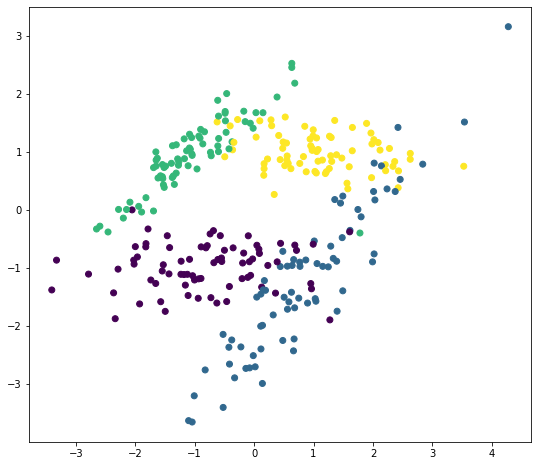

In [102]:
# Generate classification dataset with 2 features and 4 possible classes or targets
x, y = datasets.make_classification(n_samples=300, n_features=2, n_classes=4, n_redundant=0, n_clusters_per_class=1)
# try to modify the relation between x and y or play with the noise value
#y = y**2
#y = np.sin(y)
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)
plt.show()

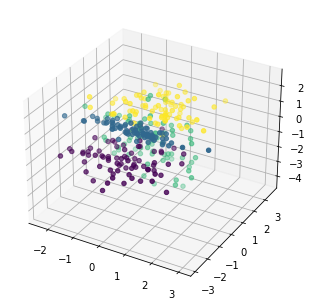

In [103]:
# %matplotlib qt 
# this makes that plots show in an interactive window
fig = plt.figure()
ax = Axes3D(fig)

# Generate classification dataset with 3 features and 4 classes
x, y = datasets.make_classification(n_samples=300, n_features=3, n_classes=4, n_redundant=0, n_clusters_per_class=1)
ax.scatter(x[:,0], x[:,1], x[:,2],c=y)
plt.show()

In [104]:
# %matplotlib inline
# reset the plot behavior

### Some popular models
Like in the case of regression there are a lot of algorithms for classification. Many of them have implementations both for regression or classification. 

In the following plots, the decision regions will be plotted. Those are the regions that the model will use to perform the classification, an input will be classified depending on which region it appears.

#### Logistic regression
Don't be misleading with the regression word, this model can only be used for classification.

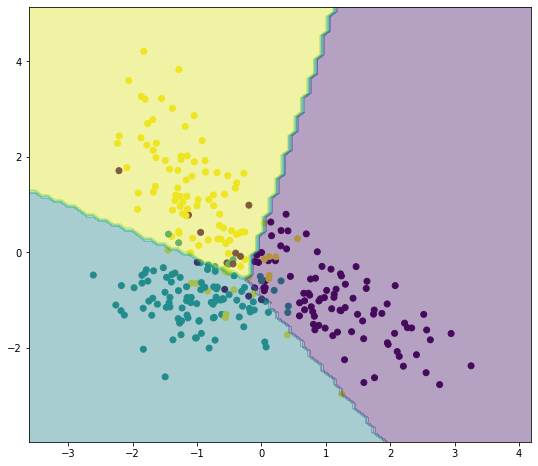

In [106]:
from sklearn.linear_model import LogisticRegression

# 2 features and 3 classes (thus, 3 decission regions will be generated)
x, y = datasets.make_classification(n_samples=300, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1)

# For decision regions
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

model = LogisticRegression(multi_class="auto", solver="lbfgs").fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

#### Decision Tree

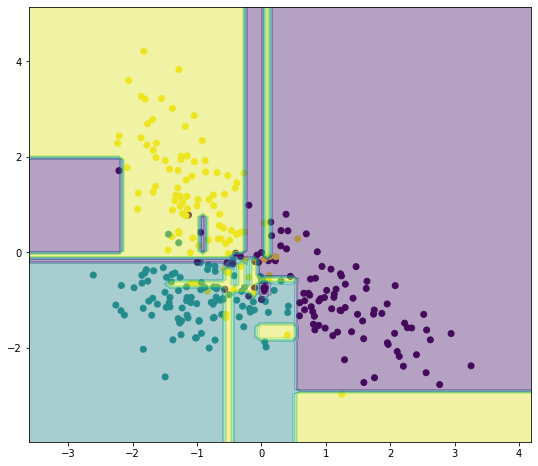

In [107]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

#### Random Forest

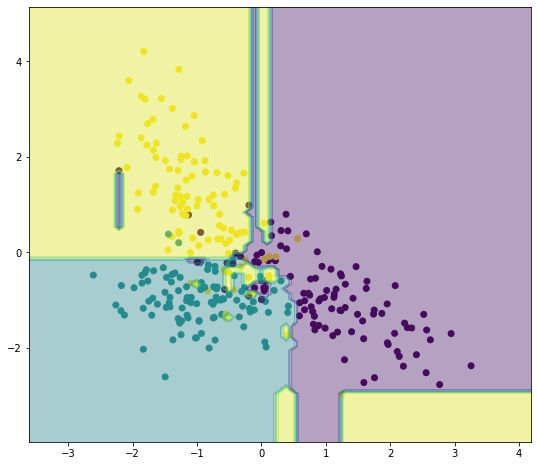

In [108]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

#### K Nearest Neighbors

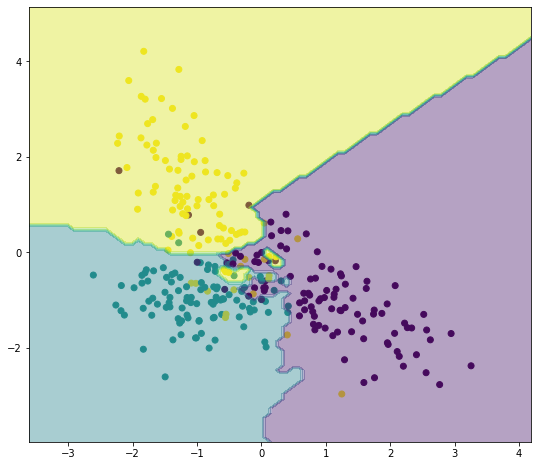

In [109]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

#### Perceptron

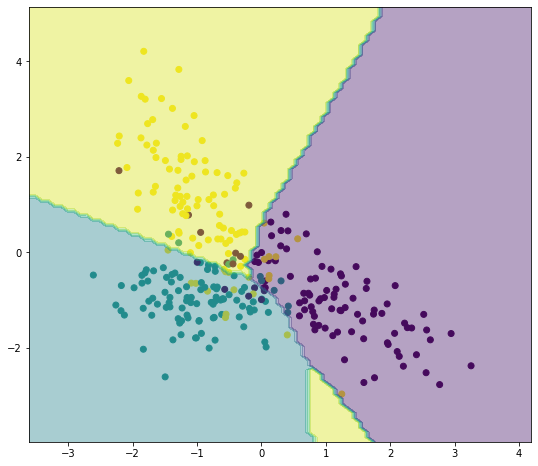

In [111]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=20000).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

### How to evaluate a classification model
In this case the output is a class or a label, so we can't calculate the error, instead we will calculate a ratio between the number of times that the output is correct and another count of the outputs, the total number or the number of wrong outputs for example. For example, the most intuitive way to evaluate a classification model is the accuracy : How many times my model guess the correct answer over all the anwsers?. But, even if this can be useful in some cases, in practice, it is not an informative measure.

### Confusion matrix
This is the main tool to evaluate a classification model https://en.wikipedia.org/wiki/Confusion_matrix. It is defined as:

"By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$."

In other words it is a matrix where columns represents the true class and the rows the output class. With it we can know how many samples have been correctly classified and which classes can be confused.


In the case of binary classification, the matrix has only 2 columns and 2 rows, and each of the cells has a proper name.

There are some metrics obtained from these cells:
### 1. Accuracy: the ratio of correctly predicted over the total of samples $\frac{TP+TN}{TP+FP+TN+FN}$

Only useful when we have balanced classes.
   
   
### 2. Precision: the ratio of correctly positive predicted over all predicted as positive $\frac{TP}{TP+FP}$


### 3. Recall: the ratio between positive predicted and the total of positive samples $\frac{TP}{TP+FN}$


### 4. F1 score: harmonic mean of precision and recall $\frac{Precision*Recall}{Precision+Recall}=\frac{2*TP}{2*TP+FP+FN}$

Metric to express precision and recall with an unique value

Usually more complex metrics are used, but for this course the F1 score is enough. And again, don't worry, scikit learn includes all these calculations.

### TP = True Positive -> It was TRUE and the model detected it was TRUE
### TN = True Negative -> It was FALSE and the model detected it was FALSE
### FP = False Positive -> It was FALSE and the model detected it was TRUE
### FN = False Negative -> It was TRUE and the model detected it was FALSE

In [115]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Models Dictionary
models = {"Logistic Regression":LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=20000), \
          "Decision Tree": DecisionTreeClassifier(), \
          "Random Forest": RandomForestClassifier(n_estimators=200), \
          "Nearest Neighbors": KNeighborsClassifier(n_neighbors=3), \
          "Perceptron": MLPClassifier(max_iter=20000)}

# Gen random classification dataset
# 2 features and 3 classes (thus, 3 decission regions will be generated)
x, y = datasets.make_classification(n_samples=300, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1)

# For every model
for name in models:
    print("Start training models of {}".format(name))
    i = 0
    
    f1_global = []
    
    # Train / test using cross validation
    for train, test in kf.split(x):
        i+=1
        x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]
        model = models[name].fit(x_train,y_train)
        y_out = model.predict(x_test)
        # We have to provide the real value of the target and the model's output
        f1_global.append(f1_score(y_test, y_out, average="weighted"))
        print('Split {}'.format(i))
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_out))
        print(classification_report(y_test, y_out))
        
    # Global metrics
    print("Global: f1={:.4f}\n".format(np.average(f1_global)))

Start training models of Logistic Regression
Split 1
Confusion Matrix:
[[24  0  0]
 [ 0 16  2]
 [ 0  0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      0.89      0.94        18
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

Split 2
Confusion Matrix:
[[17  0  0]
 [ 0 17  5]
 [ 1  0 20]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.77      0.87        22
           2       0.80      0.95      0.87        21

    accuracy                           0.90        60
   macro avg       0.91      0.91      0.90        60
weighted avg       0.91      0.90      0.90        60

Split 3
Confusion Matrix:
[[16  0  0]
 [ 0 16  2]
 [ 1  0 25]]
    

### Try it
In the next cell you can find a code to generate labeled vectors obtained from the publications dataset. As we have a label we can use this data to train a classification model. The label will be the type of a publication, and the features vector will contains: the number of pages, the number of authors, the title's lenght and the number of citations. Find wich is the model that works better with this data and answer the following questions:

- Which is the best algorithm?
- What is the average F1 score for that algorithm?
- Which is the publication type most difficult to classify?
- With which publication type are most often confused the articles?
- Which publication type is usually missclassified as article?

In [117]:
# Data preprocessing
import re
from sklearn import preprocessing

# Modify and process publications dataset
publications.dropna(subset=["pages", "authors", "title","type","cited_count"], inplace = True) #Remove publications without needed data
publications["nauthors"] = publications.authors.apply(len) # Calculate number of authors
publications["ltitle"] = publications.title.apply(len) # Calculate title length

# The publication type will be our classification target or class
publications = publications.loc[publications.type.isin(["Article", "Chapter", "Conference Paper", "Review"])]

#Features for the classification
x = publications[["pages", "nauthors", "ltitle", "cited_count"]].values

#Labels, classes or targets - Substituted to integers from 0 to 3 using LabelEncoder
y_labels = publications.type.values
enc = preprocessing.LabelEncoder().fit(y_labels)
y = enc.transform(y_labels)

for i in range(len(enc.classes_)):
    print("Class {} encoded as {}".format(enc.classes_[i], i))

Class Article encoded as 0
Class Chapter encoded as 1
Class Conference Paper encoded as 2
Class Review encoded as 3


In [118]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Models Dictionary
models = {"Logistic Regression":LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=20000), \
          "Decision Tree": DecisionTreeClassifier(), \
          "Random Forest": RandomForestClassifier(n_estimators=200), \
          "Nearest Neighbors": KNeighborsClassifier(n_neighbors=3), \
          "Perceptron": MLPClassifier(max_iter=20000)}

# For every model
for name in models:
    print("Start training models of {}".format(name))
    i = 0
    
    f1_global = []
    
    # Train / test using cross validation
    for train, test in kf.split(x):
        i+=1
        x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]
        model = models[name].fit(x_train,y_train)
        y_out = model.predict(x_test)
        # We have to provide the real value of the target and the model's output
        f1_global.append(f1_score(y_test, y_out, average="weighted"))
        print('Split {}'.format(i))
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_out))
        print(classification_report(y_test, y_out))
        
    # Global metrics
    print("Global: f1={:.4f}\n".format(np.average(f1_global)))

Start training models of Logistic Regression
Split 1
Confusion Matrix:
[[3262    8  531    0]
 [ 105    8   13    0]
 [1669    1 1153    0]
 [  96    1   22    3]]
              precision    recall  f1-score   support

           0       0.64      0.86      0.73      3801
           1       0.44      0.06      0.11       126
           2       0.67      0.41      0.51      2823
           3       1.00      0.02      0.05       122

    accuracy                           0.64      6872
   macro avg       0.69      0.34      0.35      6872
weighted avg       0.65      0.64      0.62      6872

Split 2
Confusion Matrix:
[[3397    6  520    0]
 [  98    4   11    0]
 [1556    0 1146    0]
 [ 114    1   17    2]]
              precision    recall  f1-score   support

           0       0.66      0.87      0.75      3923
           1       0.36      0.04      0.06       113
           2       0.68      0.42      0.52      2702
           3       1.00      0.01      0.03       134

    accura

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Split 5
Confusion Matrix:
[[3454   15  962    2]
 [ 132   11   40    0]
 [ 921    1 1098    0]
 [ 175    3   58    0]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      4433
           1       0.37      0.06      0.10       183
           2       0.51      0.54      0.53      2020
           3       0.00      0.00      0.00       236

    accuracy                           0.66      6872
   macro avg       0.40      0.35      0.35      6872
weighted avg       0.64      0.66      0.65      6872

Global: f1=0.6578

Start training models of Decision Tree
Split 1
Confusion Matrix:
[[2719   42  864  176]
 [  78   21   25    2]
 [1422   34 1320   47]
 [  88    2   20   12]]
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      3801
           1       0.21      0.17      0.19       126
           2       0.59      0.47      0.52      2823
           3       0.05      0.10      0.07       12

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Class Encoding

Class Article encoded as 0

Class Chapter encoded as 1

Class Conference Paper encoded as 2

Class Review encoded as 3

## Which is the best algorithm?
The one with the highest F1 metric, which are the Random Forest with F1 = 0.6632 and the Perceptron with F1 = 0.6697. As the difference is not significant, the best one is the simplest one, which is Random Forest.

## What is the average F1 score for that algorithm?
As indicated before, for the Random Forest we have F1 = 0.6632

## Which is the publication type most difficult to classify?
Looking at the confussion matrixes and the metrics, we can tell that the class with more errors in the classification is class 3, which corresponds to Reviews. This might be due to the low number of papers that we have of the review type in the training dataset. 

## With which publication type are most often confused the articles?
The Articles are mainly wrongfully thought to be Conference Papers, as we can see in the confusion matrix.

## Which publication type is usually missclassified as article?
On the contrary, the Conference Papers are usually missclassified as Articles. This clearly indicates that the difference between an Article and a Conference Paper cannot be easily obtained with the chosen attributtes. 